Number of Attack IPs by Operating System:
OS Name and Version
iOS 11.2.6             510
iOS 13.4               410
Android 4.1            184
Android 2.2            137
Android 6.0.99         103
                      ... 
BlackBerry OS 7.0.0      1
iOS 13.0                 1
Android 6.0.2            1
iOS 8.0                  1
iOS 6.0                  1
Name: count, Length: 65, dtype: int64


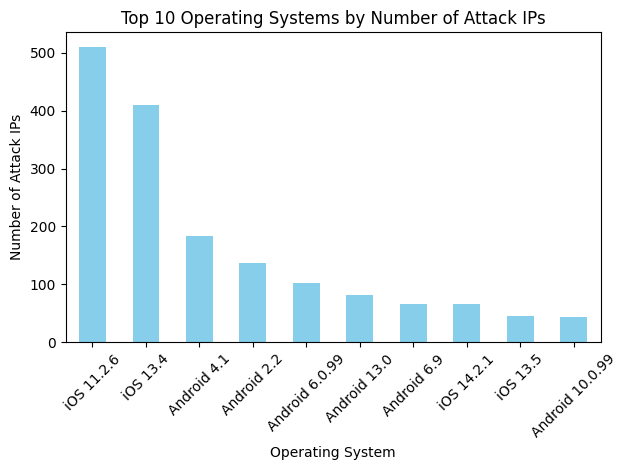

In [4]:
import pandas as pd

df = pd.read_csv("cleaned_40k.csv")

attack_ips = df[df['Is Attack IP'] == True]

os_counts = attack_ips['OS Name and Version'].value_counts()

os_counts_sorted = os_counts.sort_values(ascending=False)

print("Number of Attack IPs by Operating System:")
print(os_counts_sorted)

import matplotlib.pyplot as plt

top_os = os_counts_sorted.head(10)
top_os.plot(kind='bar', color='skyblue')
plt.title('Top 10 Operating Systems by Number of Attack IPs')
plt.xlabel('Operating System')
plt.ylabel('Number of Attack IPs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-6-f682926094e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack_ips['Browser Name'] = attack_ips['Browser Name and Version'].str.split(' ').str[0]


Number of Attack IPs by Browser Type:
Browser Name
Chrome            1336
Android            385
Firefox            266
Opera              163
Mobile              46
Safari              12
Snapchat             9
Iron                 9
Edge                 8
UC                   7
IE                   3
MiuiBrowser          1
AwarioSmartBot       1
Samsung              1
Name: count, dtype: int64


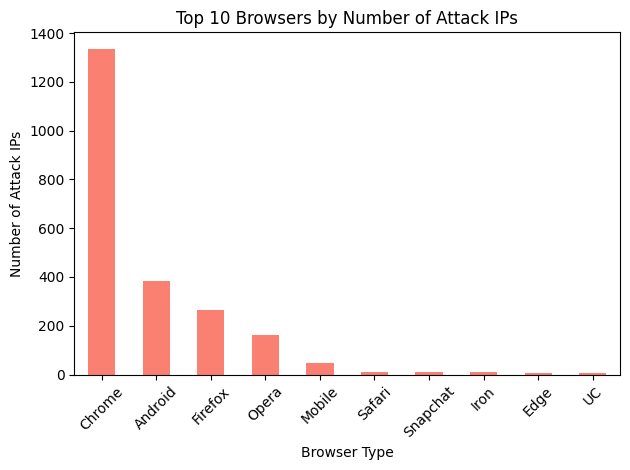

In [6]:
import pandas as pd

df = pd.read_csv("cleaned_40k.csv")
attack_ips = df[df['Is Attack IP'] == True]
attack_ips['Browser Name'] = attack_ips['Browser Name and Version'].str.split(' ').str[0]
browser_counts = attack_ips['Browser Name'].value_counts()
browser_counts_sorted = browser_counts.sort_values(ascending=False)

print("Number of Attack IPs by Browser Type:")
print(browser_counts_sorted)

import matplotlib.pyplot as plt

top_browsers = browser_counts_sorted.head(10)
top_browsers.plot(kind='bar', color='salmon')
plt.title('Top 10 Browsers by Number of Attack IPs')
plt.xlabel('Browser Type')
plt.ylabel('Number of Attack IPs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Number of Attack IPs by Country:
Country
US    991
NO    868
MY    178
PK     80
MM     24
GB     21
CA     11
NL     11
BD      8
DK      8
IN      6
DE      5
FR      5
IT      4
HK      4
PL      4
SE      4
SK      2
TR      2
AT      2
LV      2
CZ      2
BE      2
GR      2
TH      1
Name: count, dtype: int64
Number of Attack IPs by Region:
Region
Oslo County      593
New Jersey       223
California       185
Illinois         171
Penang           121
                ... 
Kuala Lumpur       2
Thessaloniki       2
New Hampshire      2
North              1
Bangkok            1
Name: count, Length: 67, dtype: int64


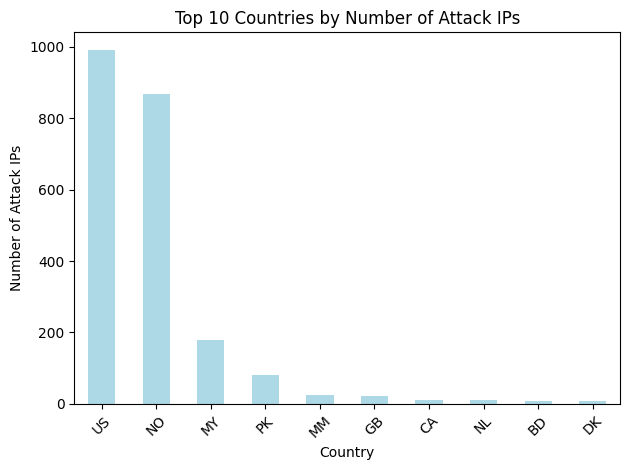

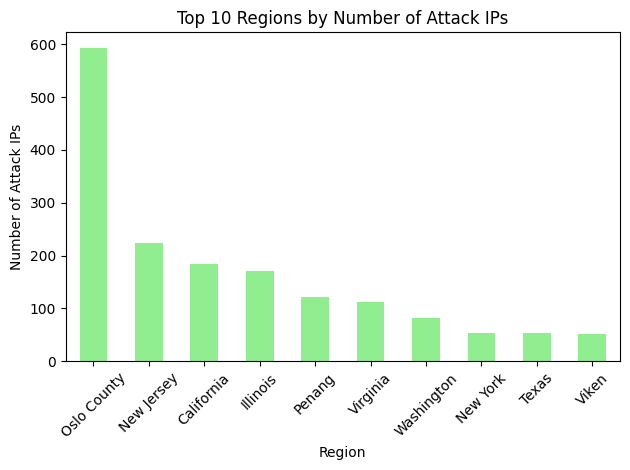

In [7]:
import pandas as pd

df = pd.read_csv("cleaned_40k.csv")
attack_ips = df[df['Is Attack IP'] == True]
country_counts = attack_ips['Country'].value_counts()
region_counts = attack_ips['Region'].value_counts()

print("Number of Attack IPs by Country:")
print(country_counts)

print("Number of Attack IPs by Region:")
print(region_counts)

import matplotlib.pyplot as plt

top_countries = country_counts.head(10)
top_countries.plot(kind='bar', color='lightblue')
plt.title('Top 10 Countries by Number of Attack IPs')
plt.xlabel('Country')
plt.ylabel('Number of Attack IPs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_regions = region_counts.head(10)
top_regions.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Regions by Number of Attack IPs')
plt.xlabel('Region')
plt.ylabel('Number of Attack IPs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

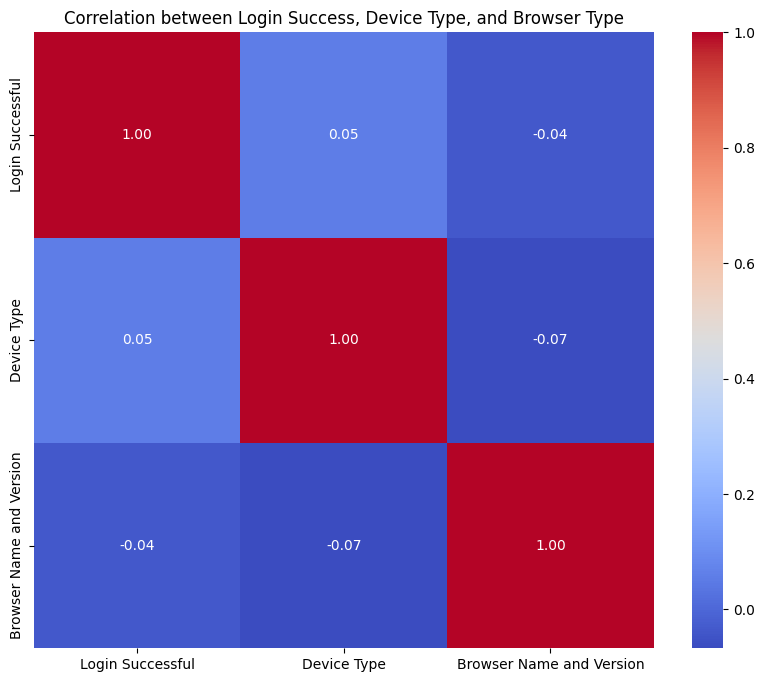

<ipython-input-9-01c012474d0e>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_by_location_device = df.groupby(['Country', 'Device Type'])['Login Successful'].value_counts(normalize=True).unstack()


<Figure size 1200x800 with 0 Axes>

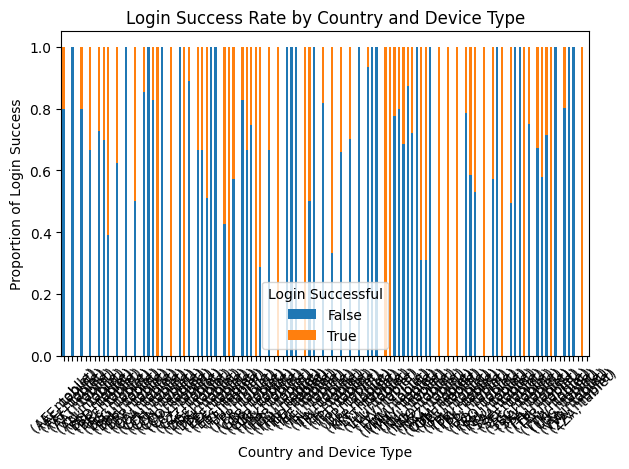

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_40k.csv")

df['Login Successful'] = df['Login Successful'].astype('category')
df['Device Type'] = df['Device Type'].astype('category')
df['Browser Name and Version'] = df['Browser Name and Version'].astype('category')
df['Country'] = df['Country'].astype('category')

correlation_matrix = df[['Login Successful', 'Device Type', 'Browser Name and Version']].apply(lambda x: x.cat.codes).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation between Login Success, Device Type, and Browser Type')
plt.show()

success_by_location_device = df.groupby(['Country', 'Device Type'])['Login Successful'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12, 8))
success_by_location_device.plot(kind='bar', stacked=True)
plt.title('Login Success Rate by Country and Device Type')
plt.xlabel('Country and Device Type')
plt.ylabel('Proportion of Login Success')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

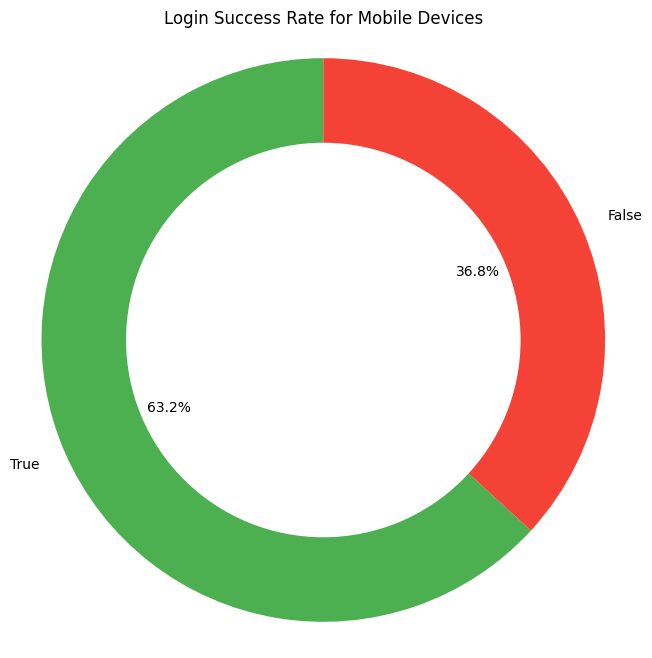

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_40k.csv")

mobile_success_counts = df[df['Device Type'] == 'mobile']['Login Successful'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(mobile_success_counts, labels=mobile_success_counts.index, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Login Success Rate for Mobile Devices')
plt.show()

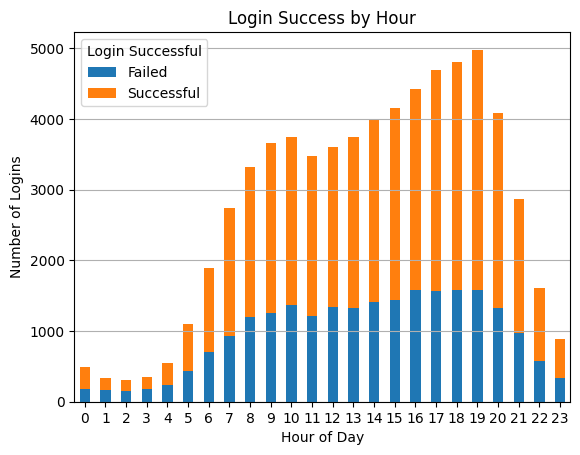

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_40k.csv")

df['Login Timestamp'] = pd.to_datetime(df['Login Timestamp'])

df['Hour'] = df['Login Timestamp'].dt.hour

login_counts = df.groupby(['Hour', 'Login Successful']).size().unstack(fill_value=0)

login_counts.plot(kind='bar', stacked=True)
plt.title('Login Success by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Logins')
plt.xticks(rotation=0)
plt.legend(title='Login Successful', labels=['Failed', 'Successful'])
plt.grid(axis='y')

plt.show()